## Imports

In [ ]:
!pip install imutils

In [10]:
import os
import cv2
import numpy as np
import pytesseract
from matplotlib import pyplot as plt
import imutils

## Tesseract path

In [11]:
tesseract_path = "C:/Program Files/Tesseract-OCR/tesseract.exe"
pytesseract.pytesseract.tesseract_cmd = tesseract_path

## Read image

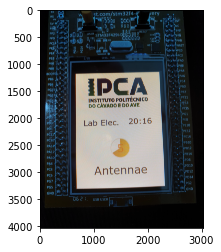

In [165]:
folder = 'dataset'
file = 'Antennae_0.jpg'

#folder = 'dataset/old_pictures/'
#file = 'ui_001.jpg'

img = cv2.imread(os.path.join(folder, file))
plt.imshow(img)

## Convert to grayscale

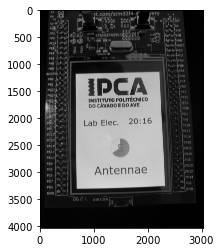

In [166]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

## Convert to binary with OTSU method

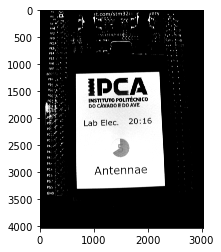

In [167]:
_, img_th1 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)
plt.imshow(img_th1, cmap='gray')

## Get screen coordinates

In [168]:
# Find biggest contour (screen)
contours, hierarchy = cv2.findContours(img_th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
biggest_contour = max(contours, key=cv2.contourArea)
# Get bounding box around screen
x, y, w, h = cv2.boundingRect(biggest_contour)

print(f'Screen coordinates: {(x, y), (x+w, y+h)}')

Screen coordinates: ((658, 1143), (2304, 3308))


## Get region of interest

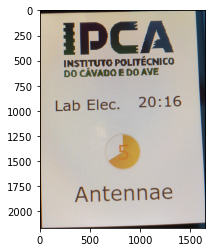

In [169]:
img_roi = img[y:y+h, x:x+w]
plt.imshow(img_roi)

## Resize image

In [170]:
# resize image
img_resized = cv2.resize(img_roi, (640, 860), interpolation=cv2.INTER_AREA)
print(img_resized.shape)

(860, 640, 3)


## Convert to grayscale

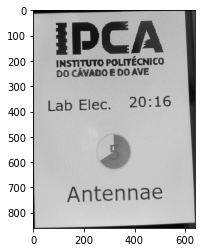

In [171]:
img_roi_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
plt.imshow(img_roi_gray, cmap='gray')

## Threshold with OTSU and invert image 

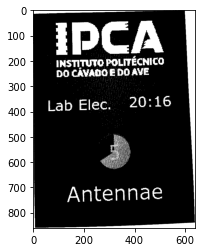

In [172]:
_, img_th2 = cv2.threshold(img_roi_gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
plt.imshow(img_th2, cmap='gray')

## Delete Noise and get contours

# of contours: 8
# Cycles: 1


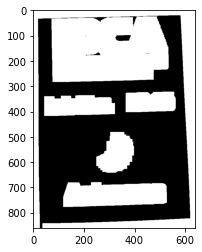

In [176]:
# Create kernel for Erosion
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

# Applying Erosion on the threshold image
img_erode = cv2.erode(img_th2, rect_kernel)

# Create kernel Dilatation
rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (38, 38))

# Applying dilation on the threshold image
img_dilated = cv2.dilate(img_erode, rect_kernel)
plt.imshow(img_dilated, cmap='gray')

flag = True
i = 0
# Finding contours
while(flag):
    i += 1
    print(f'# of contours: {len(contours)}')
    contours, hierarchy = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if(len(contours) < 2):
        img_dilated = img_dilated[10:-50, 10:-20]
    else:
        flag = False
        
print(f"# Cycles: {i}")
plt.imshow(img_dilated, cmap='gray')

## Find words

0: Antennae
2: 
3: 20.16
4: iDCA

INSTITUTO POLITECNICO
00 CAVADO E00 AVE
5: IDCA

INSTITUTG POLITECNICO
DO CAVADG E DO AVE

saa

Antennae

Antennae
Text: ['Antennae', '', '20.16', 'iDCA\n\nINSTITUTO POLITECNICO\n00 CAVADO E00 AVE', 'IDCA\n\nINSTITUTG POLITECNICO\nDO CAVADG E DO AVE\n\nsaa\n\nAntennae\n\nAntennae'], List lenght: 5
Area: [34214.0, 19939.5, 14779.0, 108841.0, 79137.5], List lenght: 5


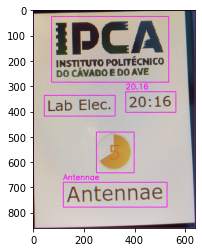

In [177]:
text_list = []
area_list = []

# Creating a copy of image
img_result = img_resized.copy()

for i, cnt in enumerate(contours):
    x, y, w, h = cv2.boundingRect(cnt)

    # Drawing a rectangle on copied image
    rect = cv2.rectangle(img_result, (x, y), (x+w, y+h), (255, 0, 255), 2)    
    
    # Cropping the text block for giving input to OCR
    cropped = img_result[y:y+h, x:x+w]
    cv2.imwrite(f'crops/{i}.jpg', cropped)
     
    # Apply OCR on the cropped image
    text = pytesseract.image_to_string(cropped)
    if text :
        # Write text next of boundingRect
        if (i < 4):
            cv2.putText(img_result, text.strip(), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)
        print(f'{i}: {text.strip()}')
        text_list.append(text.strip())
        area = cv2.contourArea(cnt)
        area_list.append(area)    

print(f'Text: {text_list}, List lenght: {len(text_list)}')
print(f'Area: {area_list}, List lenght: {len(text_list)}')
plt.imshow(cropped)   

In [146]:
# Create a copy of image
img_result = img_roi.copy()

# Get raw data from image
raw_data = pytesseract.image_to_data(img_result)
for count, data in enumerate(raw_data.splitlines()):
    # Exclude first row (column names)
    if count > 0:
        # Parse data to list
        data = data.split()
        # Check if there's text
        if len(data) == 12:
            # Get text coordinates
            x, y, w, h = int(data[6]), int(data[7]), int(data[8]), int(data[9])
            # Get text
            content = data[11]
            print(content)

# Loop Test 

In [164]:
words = ['Andromeda','Antennae','Backward','Black eye','Bodes','Butterfly','Chartwheel','Cigar','Circinus','Comet','Cosmos',
         'Eye of Sauron','Fireworks','Hockey Stick','Hoags','Magellanic','Lindsay','Malin 1','Medusa Meger','Mayalls',
         'Milky Way','Needle','Pinwheel','Sculptor','Sombrero','Sunflower','Tadpole','Triangulum','Whirlpool','Mercurio',
         'Venus','Terra','Marte','Jupiter','Saturno','Urano','Neptuno','Plutão','Sol','Lua']

#Directorio do Projeto (Escrever o directório do projeto)
os.chdir(r'C:\Users\Dasil\2. Processamento de Imagem e Visao por Computador\PIVC_TP')
#os.chdir(r'C:/Users/lemos/PDS/TP/')


#directory = 'C:/Users/lemos/'
#directory = 'C:/Users/Dasil/2. Processamento de Imagem e Visao por Computador/PIVC_TP/dataset/'
folder = 'dataset'

directory = folder + '/'

for file in os.listdir(directory):
    
    img = cv2.imread(os.path.join(folder, file))

    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    _, img_th1 = cv2.threshold(img_gray, 0, 255, cv2.THRESH_OTSU)

    # Find biggest contour (screen)
    contours, hierarchy = cv2.findContours(img_th1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    biggest_contour = max(contours, key=cv2.contourArea)
    # Get bounding box around screen
    x, y, w, h = cv2.boundingRect(biggest_contour)
    
    img_roi = img[y:y+h, x:x+w]

    # resize image
    img_resized = cv2.resize(img_roi, (640, 860), interpolation=cv2.INTER_AREA)
    
    img_roi_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    
    _, img_th2 = cv2.threshold(img_roi_gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)

    # Create kernel for Erosion
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))

    # Applying Erosion on the threshold image
    img_erode = cv2.erode(img_th2, rect_kernel)
    
    # Create kernel
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (38, 38))

    # Applying dilation on the threshold image
    img_dilated = cv2.dilate(img_erode, rect_kernel)

    flag = True
    i = 0
    # Finding contours
    while(flag):
        i += 1
        contours, hierarchy = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if(len(contours) < 2):
            img_dilated = img_dilated[10:-50, 10:-20]
        else:
            flag = False
            
    text_list = []
    area_list = []

    # Creating a copy of image
    img_result = img_resized.copy()

    for i, cnt in enumerate(contours):
        x, y, w, h = cv2.boundingRect(cnt)

        # Drawing a rectangle on copied image
        rect = cv2.rectangle(img_result, (x, y), (x+w, y+h), (255, 0, 255), 2)    

        # Cropping the text block for giving input to OCR
        cropped = img_result[y:y+h, x:x+w]
        cv2.imwrite(f'crops/{i}.jpg', cropped)

        # Apply OCR on the cropped image
        text = pytesseract.image_to_string(cropped)
        if text :
            # Write text next of boundingRect
            if (i < 4):
                cv2.putText(img_result, text.strip(), (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 255), 2)
            text_list.append(text.strip())
            area = cv2.contourArea(cnt)
            area_list.append(area)    
    cv2.imwrite(f'ARpics/{file}.jpg', cropped)
    
    
    
    